## Drawing a directed graph

We start by drawing a simplification of the Internet with just 4 nodes.

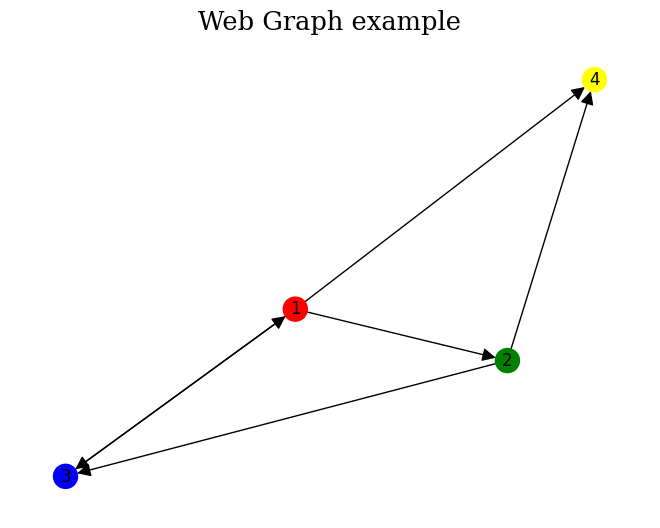

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
H = nx.DiGraph()


# Add nodes. For example, let's say we have 4 websites: 'A', 'B', 'C' and 'D'
H.add_node('A')
H.add_node('B')
H.add_node('C')
H.add_node('D')

# Add edges. Let's say 'A' links to 'B', 'B' links to 'C', 'C' links back to 'A' and viceversa, 'C' links to 'D' and 'B' links to 'D'.

H.add_edge('A', 'B')
H.add_edge('B', 'C')
H.add_edge('C', 'A')
H.add_edge('A', 'C')
H.add_edge('B', 'D')
H.add_edge('A', 'D')
# Each node is labeled
labels = {'A': '1', 'B': '2', 'C': '3', 'D': 4}

# Each node is assigned a color

color_map = []
for node in H:
    if node == 'A':
        color_map.append('red')
    elif node == 'B':
        color_map.append('green')
    elif node == 'C':
        color_map.append('blue')
    else: color_map.append('yellow')

# The graph is drawn.

pos = nx.spring_layout(H)

nx.draw(H, pos, node_color=color_map, with_labels=False, arrowsize=20)

nx.draw_networkx_labels(H, pos, labels=labels, font_size=12, font_family='sans-serif')

plt.title('Web Graph example', fontdict = {'family':'serif','color':'black','size':18.5})

plt.show()

## Creation and normalisation of link matrix

In [3]:
from sklearn.preprocessing import normalize
# For directed graphs, entry (i, j) corresponds to an edge from i to j
A = nx.to_numpy_array(H)

# L1 normalisation

norm_A = normalize(A, norm='l1').transpose()
norm_A.view()


array([[0.        , 0.        , 1.        , 0.        ],
       [0.33333333, 0.        , 0.        , 0.        ],
       [0.33333333, 0.5       , 0.        , 0.        ],
       [0.33333333, 0.5       , 0.        , 0.        ]])

# Create a 4×1 vector

In [9]:
v = np.array([[.25], [.25], [.25], [.25]])
print(v)


[[0.25]
 [0.25]
 [0.25]
 [0.25]]


# Define the Google matrix

The damping factor and *n* need to be set in this step:


Let *d* = 0.85 and *n* = 4 since the dimensions of *A* is 4×4.

In [10]:
# G_i,j = d*A_i,j + (1-d)/n

d=0.85
n=len(norm_A)

G = d*norm_A + (1-d)/n

G.view()


array([[0.0375    , 0.0375    , 0.8875    , 0.0375    ],
       [0.32083333, 0.0375    , 0.0375    , 0.0375    ],
       [0.32083333, 0.4625    , 0.0375    , 0.0375    ],
       [0.32083333, 0.4625    , 0.0375    , 0.0375    ]])

# Defining PageRank

In [113]:
def pagerank(num_iterations, v):


  for i in range(num_iterations):
    v = np.dot(d*G + (1-d)/n, v)
    v = v / np.sum(v)


  return v, np.sum(v)

pagerank(10000000, v)

(array([[0.31161484],
        [0.17713744],
        [0.25562386],
        [0.25562386]]),
 0.9999999999999999)

In [83]:
print(nx.pagerank(H))

{'A': 0.3091751316110233, 'B': 0.17943499885545927, 'C': 0.2556949347667587, 'D': 0.2556949347667587}


In [69]:
!pip install fast-pagerank

In [81]:
from fast_pagerank import pagerank_power
print(pagerank_power(A, p=0.85))

[0.30917587 0.17943479 0.25569467 0.25569467]
